# Homework 4: Problems
## Due Wednesday 19 October, by 5pm

### PHYS 440/540, Fall 2022
https://github.com/gtrichards/PHYS_440_540/


## Problem 1

What does the `s6` attribute measure in the `diabetes` dataset (which is built in to Scikit Learn)?


## Problem 2

Practice with faces.  Load the classic Olivetti faces dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.  It contains 400 grayscale 64 × 64–pixel images that are flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each).

Use DESCR to learn about the data set.  Then print a listing of the target values.

Split the data into a training set, a validation set, and a test set.  Make sure to use stratification.  Most of the data should be in the training set, with the test and validation sets being smaller.

Cluster the images using K-means.

Visualize your clusters.


## Problem 3

Use [datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) to generate a fake sample of data.  It should have 100 data points each with 3 attributes/features where the objects are grouped into 4 clusters/groups.  Use `random_state=234567`.

Illustrate with a 2-D plot of two of the attributes.  Show `X` as a 100x3 table of data.  

Do it again in Pandas and give each of the attributes a name.


[Possibly useful or of interest](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62)


# Problem 1:

In [2]:
from sklearn import datasets

diabetes=datasets.load_diabetes()

#print(diabetes.DESCR)

print('s6 attribute measures glu, blood sugar level.')

s6 attribute measures glu, blood sugar level.


---
#### Problem 2 Starter Code

In [3]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [4]:
#Use DESCR to learn about the data set
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
#View the "targets"
print(olivetti.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [6]:
#Split the data into a training set, a validation set, and a test set.  Make sure to use stratification.  
#Most of the data should be in the training set, with the test and validation sets being smaller.

from sklearn.model_selection import train_test_split

X = olivetti.data
y = olivetti.target

Xtrainvalid, Xtest, ytrainvalid, ytest = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrainvalid, ytrainvalid, stratify=ytrainvalid, test_size=0.2, random_state=42)

In [7]:
print(Xtrain.shape,Xvalid.shape,Xtest.shape)

(288, 4096) (72, 4096) (40, 4096)


In [9]:
from sklearn.cluster import KMeans

k_range = range(1, 41, 10)
kmeans_scores = []
kmeans_per_k = []
for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42).fit(Xtrain)
    kmeans_per_k.append(kmeans)
    
    score = kmeans.score(Xtrain)
    kmeans_scores.append(score)
    
    print("k={}, score={}".format(k,score))

k=1, score=-22687.3671875
k=11, score=-13213.6708984375
k=21, score=-11062.8134765625
k=31, score=-9346.54296875


In [10]:
import numpy as np
best_index = np.argmax(score)
best_model = kmeans_per_k[best_index]
print(kmeans_scores[best_index])

-22687.3671875


Cluster 0


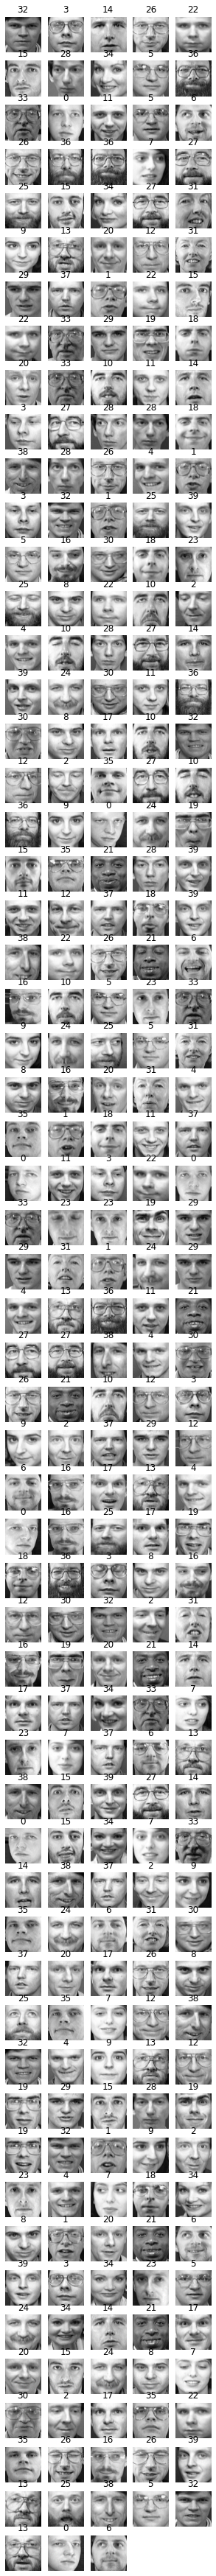

In [16]:
#Nothing for you to fill in here, but try to understand what it is doing

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray", origin='upper')
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = Xtrain[in_cluster]
    labels = ytrain[in_cluster]
    plot_faces(faces, labels)

---

#### Problem 3 Starter Code

In [12]:
import sklearn
X,y = datasets.make_blobs(n_samples=100,n_features=3,centers=4,random_state=234567)

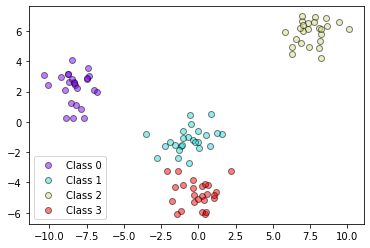

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure() #setup plot

#Needed to plot clusters in color according to their labels
y_unique = np.unique(y) 
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    # Plot the first two columns for all of the objects
    plt.scatter(this_X[:,0], this_X[:,1], c=color[np.newaxis, :],\
                alpha=0.5, edgecolor='k', label="Class %s" % this_y)
    
plt.legend(loc="best")

In [14]:
print(X)

[[-8.88678591e+00  2.26385492e-01  6.34336002e+00]
 [-7.66300575e+00  2.62764188e-01  4.70533165e+00]
 [-7.57189171e-03 -1.33418557e+00 -6.20717679e-01]
 [ 7.39811690e+00  4.92654949e+00 -2.21665623e+00]
 [-3.08525484e-01 -5.29392058e+00  5.78287897e+00]
 [-9.24181021e+00  2.93708855e+00  5.83998437e+00]
 [ 6.93926641e+00  6.63313185e+00 -1.04120531e+00]
 [-6.98811115e+00  2.13077879e+00  6.97916817e+00]
 [ 6.98315848e+00  6.97511829e+00  5.94233954e-02]
 [-8.36910960e+00  2.65116957e+00  3.94426194e+00]
 [-1.39487797e+00 -3.25475061e+00  6.41398505e+00]
 [-8.31347034e+00  2.42628604e+00  4.94385582e+00]
 [-1.04436025e+00 -6.10441032e-01  1.17071136e+00]
 [-7.41071086e+00  3.53196607e+00  6.18979785e+00]
 [-8.68638781e+00  2.61911487e+00  3.21670566e+00]
 [ 6.89559168e+00  5.20313115e+00 -3.14799551e-02]
 [-1.40165125e+00 -2.36903614e+00 -1.28871159e+00]
 [ 1.57734751e+00 -7.72777461e-01 -1.54591814e+00]
 [ 7.03377876e+00  5.97525133e+00 -1.09629523e+00]
 [ 4.68300168e-01 -6.06421235e+

In [15]:
#Now with Pandas
import pandas as pd
dfX = pd.DataFrame(np.random.uniform(0,1,size=(100,3)))
#dfX.append = [np.random.random()]
print(dfX)

           0         1         2
0   0.610784  0.605982  0.060981
1   0.178199  0.156295  0.284600
2   0.821003  0.660580  0.625444
3   0.422189  0.832750  0.766119
4   0.511812  0.783559  0.802236
..       ...       ...       ...
95  0.122558  0.243379  0.219190
96  0.262074  0.144867  0.220872
97  0.978236  0.900160  0.619819
98  0.401383  0.862488  0.844315
99  0.299934  0.508167  0.440967

[100 rows x 3 columns]
